# Reference: 
PHYSICAL REVIEW B 90, 155451 (2014) \
Atomic corrugation and electron localization due to Moir ́e patterns in twisted bilayer graphenes \
Kazuyuki Uchida, Shinnosuke Furuya, Jun-Ichi Iwata, and Atsushi Oshiyama

# Unitcell plot

In [11]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 800

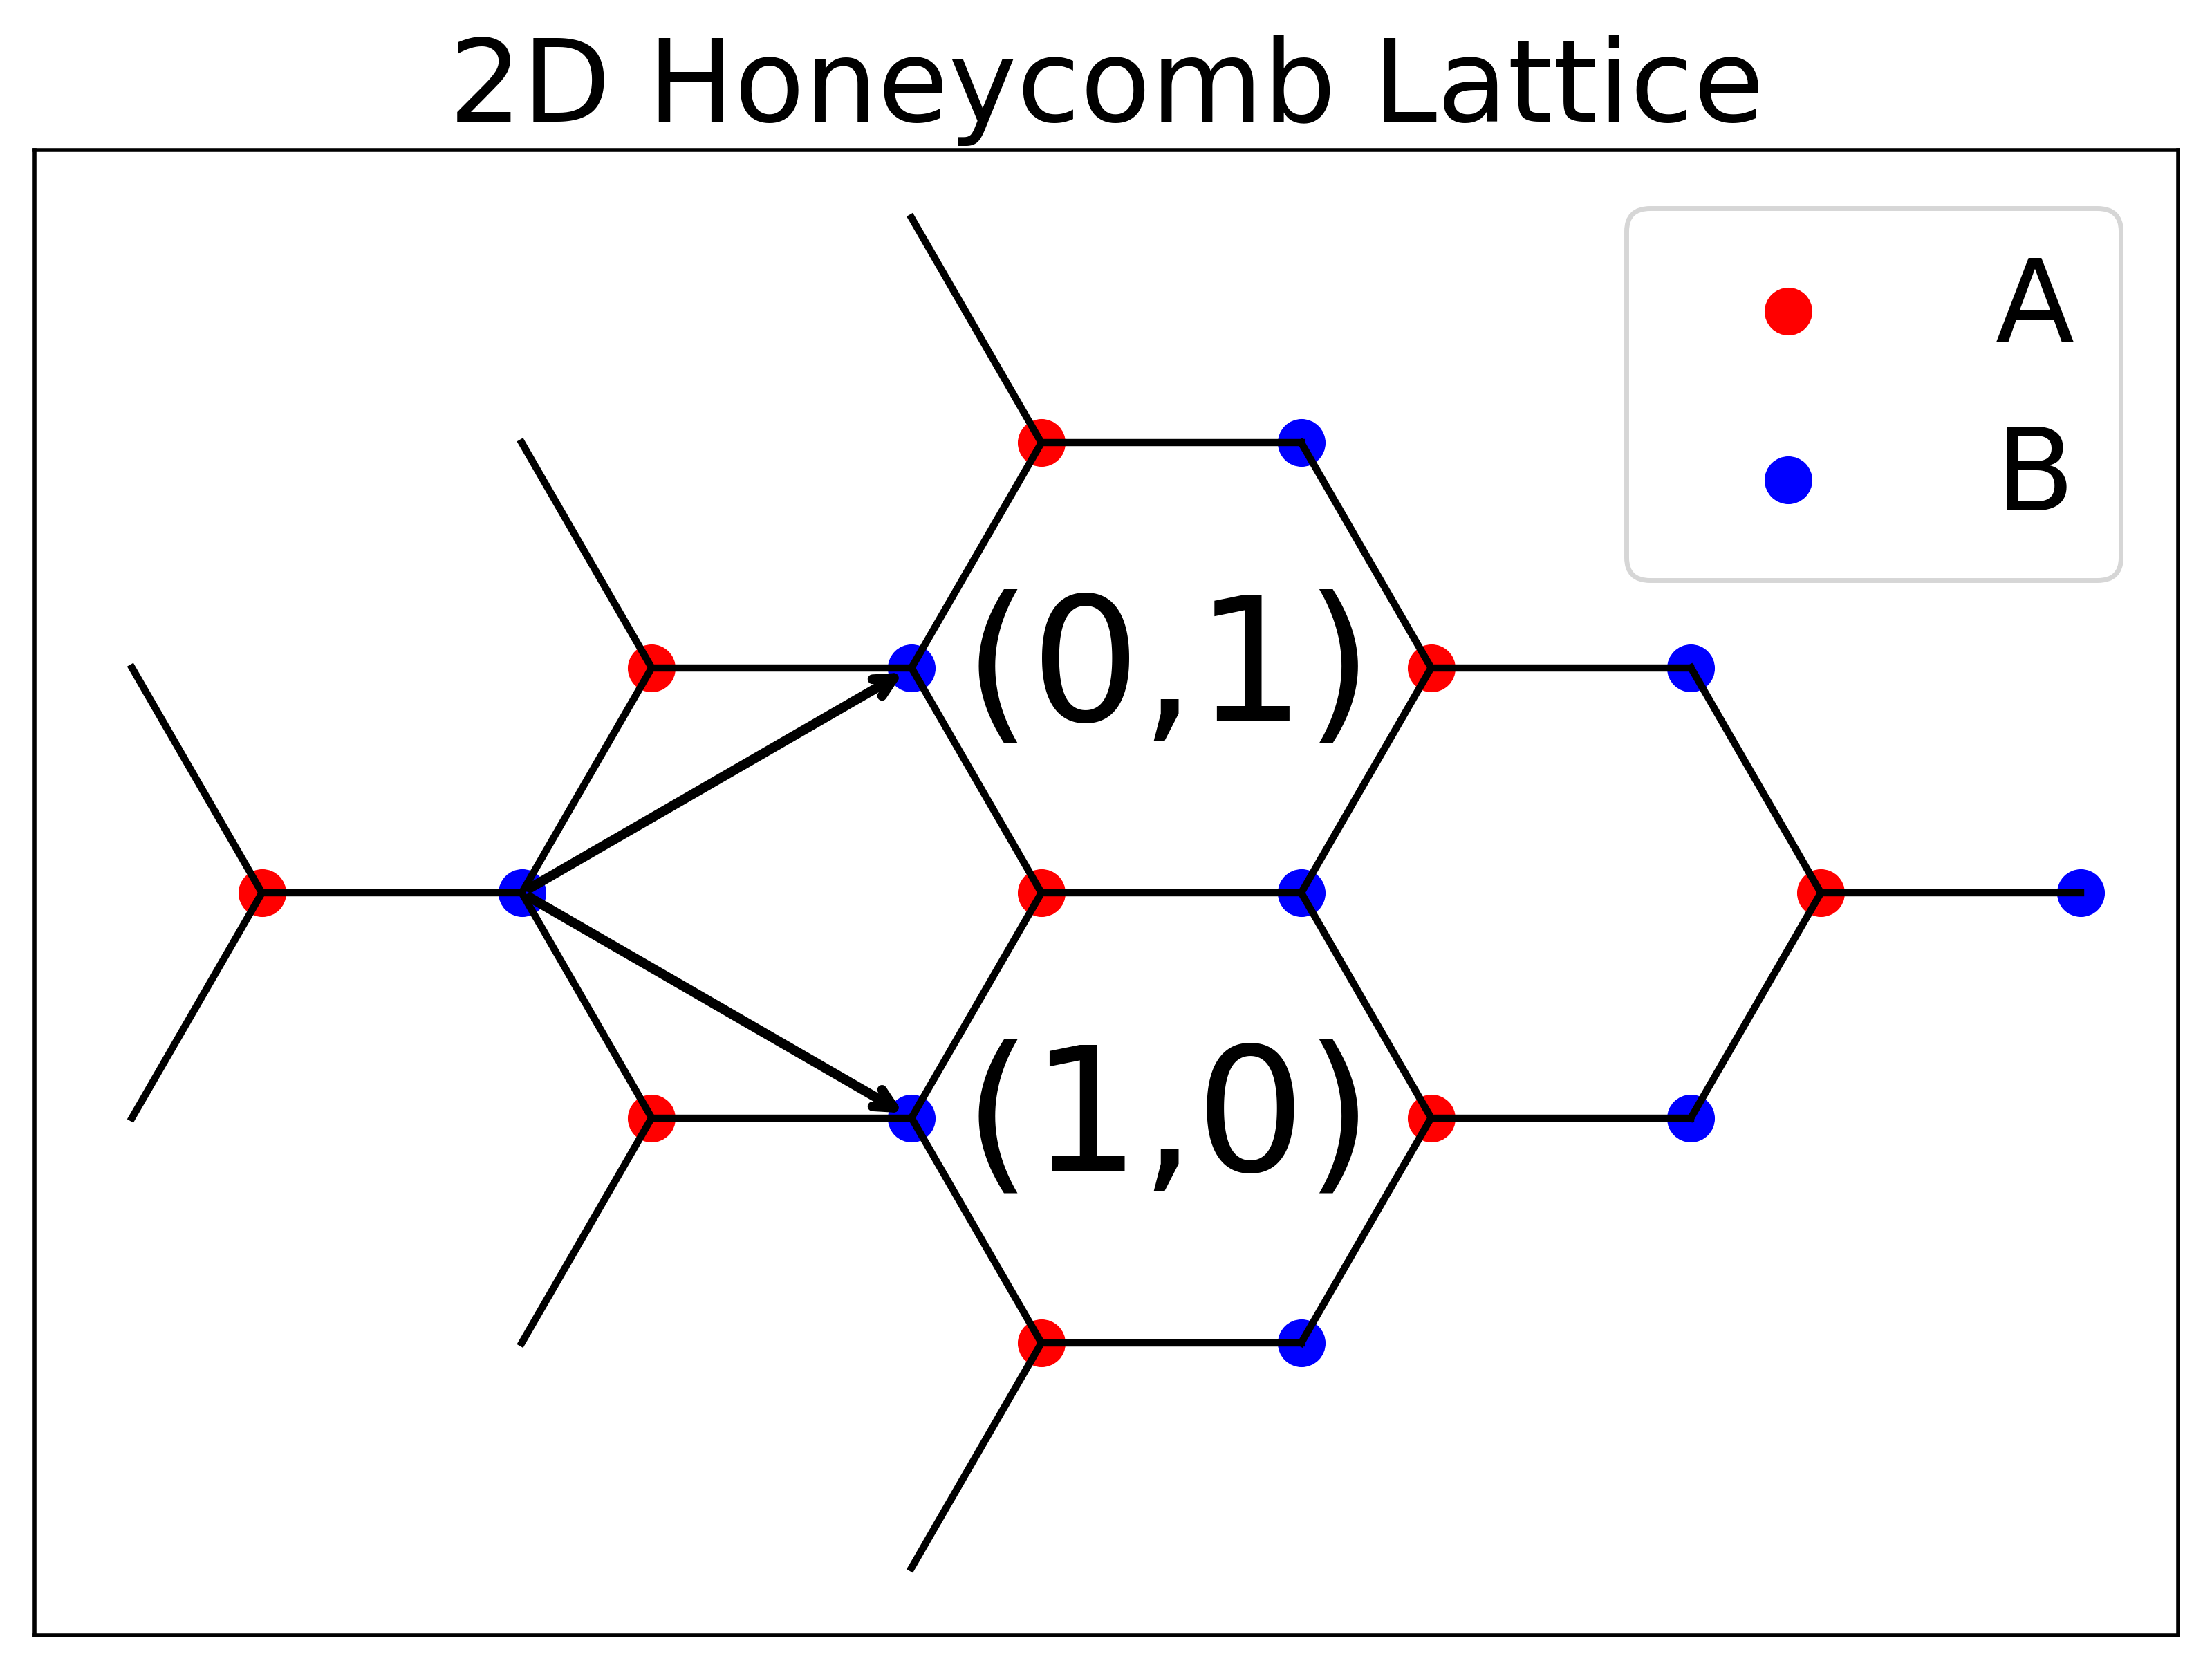

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Define lattice vectors for the honeycomb lattice
a1 = np.array([1.5, -np.sqrt(3)/2])
a2 = np.array([1.5, np.sqrt(3)/2])
delta = np.array([1.0, 0.0])  # Offset for second sublattice

# Number of cells in each direction
n1, n2 = 1, 1

# Generate lattice sites
A_sites, B_sites = [], []
for i in range(-n1, n1+1):
    for j in range(-n2, n2+1):
        r = i * a1 + j * a2
        A_sites.append(r)
        B_sites.append(r + delta)

A = np.array(A_sites)
B = np.array(B_sites)

# Plotting
fig, ax = plt.subplots(figsize=(8,6))
# A sublattice: red filled circles
ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=80, label='A')
# B sublattice: blue filled circles
ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=80, label='B')

# Draw bonds between nearest neighbors in black
neighbor_vectors = np.array([
    [1.0, 0.0],
    [-0.5, np.sqrt(3)/2],
    [-0.5, -np.sqrt(3)/2]
])
for r in A:
    for v in neighbor_vectors:
        ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k')

# Remove ticks and numbers on x and y axes
ax.set_xticks([])
ax.set_yticks([])

# Identify the leftmost B site
idx_leftmost = np.argmin(B[:, 0])
B0 = B[idx_leftmost]

# Compute neighbors corresponding to lattice shifts (1,0) and (0,1)
B1 = B0 + a1  # (1,0)
B2 = B0 + a2  # (0,1)

# Draw arrows representing (1,0) and (0,1)
ax.annotate('', xy=B1, xytext=B0, arrowprops=dict(arrowstyle='->', color='k', lw=2))
ax.annotate('', xy=B2, xytext=B0, arrowprops=dict(arrowstyle='->', color='k', lw=2))

# Label the arrows
ax.text(*(B1 + np.array([0.2, -0.2])), '(1,0)', fontsize=36, color='k')
ax.text(*(B2 + np.array([0.2, -0.2])), '(0,1)', fontsize=36, color='k')

ax.set_aspect('equal')
ax.set_title('2D Honeycomb Lattice', fontsize=24)
ax.legend(loc='upper right', fontsize=24)
plt.show()

# Supercell plot

In [53]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

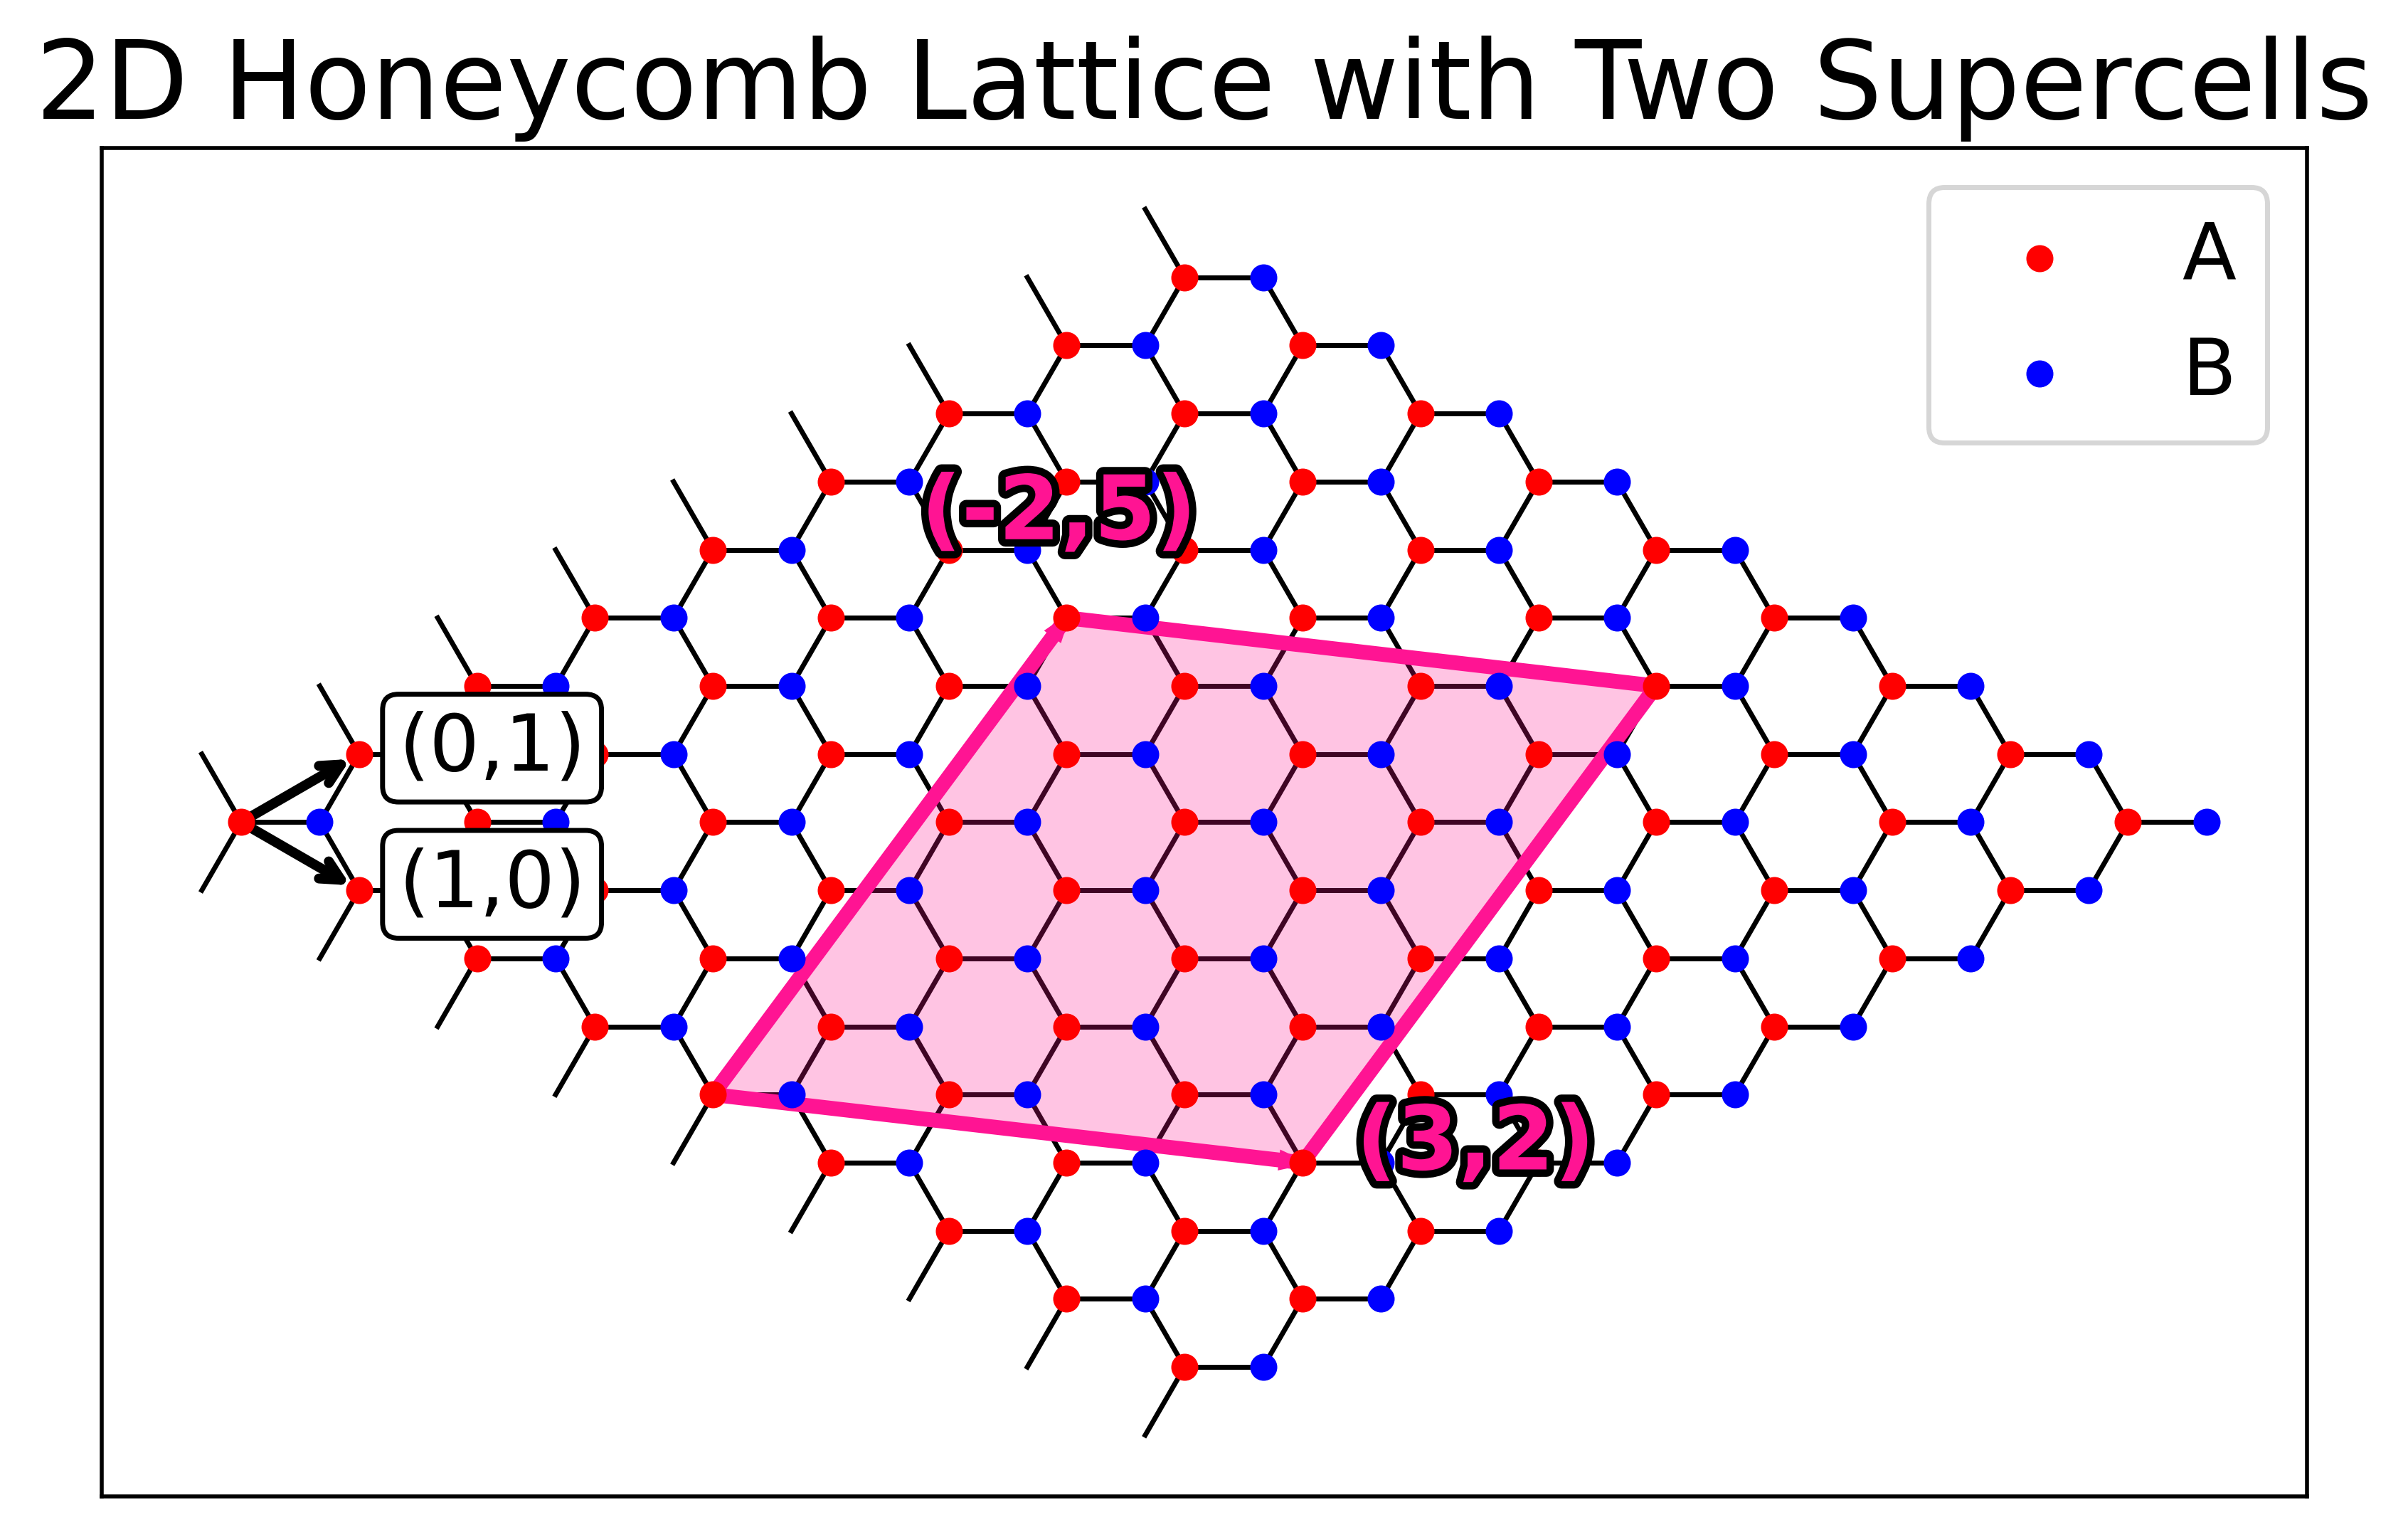

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def plot_double_supercell(N, M, n1=4, n2=4):
    # Define primitive lattice vectors for the honeycomb structure
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # Shift for B sublattice

    # Generate all lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sublattice sites
    ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=20, label='A', zorder=6)
    ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=20, label='B', zorder=6)

    # Draw nearest neighbor bonds for A sublattice
    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    for r in A:
        for v in neighbor_vectors:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the third A site from the left on the row closest to y=0
    tol = 0.1
    mask = np.abs(A[:, 1]) < tol
    A_xsorted = A[mask][np.argsort(A[mask][:, 0])]
    if len(A_xsorted) < 3:
        raise ValueError("Not enough A sites near the x-axis; try increasing n1/n2.")
    A_top = A_xsorted[2]  # 3rd from the left on y ≈ 0 row

    # Find all A sites with similar x, and y less than A_top (i.e., directly below A_top)
    x_tol = 0.2
    candidates = A[(np.abs(A[:, 0] - A_top[0]) < x_tol) & (A[:, 1] < A_top[1] - 1e-6)]
    # Sort these candidates by y ascending (from near to far downward)
    y_sorted = candidates[np.argsort(candidates[:, 1])]
    if len(y_sorted) < 2:
        raise ValueError("Not enough A sites below the reference; try increasing n1/n2.")
    A0 = y_sorted[0]  # Select the second one: two rows below A_top (supercell origin)

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    corners_red = np.array([
        A0,
        A0 + L1_red,
        A0 + L1_red + L2_red,
        A0 + L2_red,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='deeppink', alpha=0.25, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_red[0], L1_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)
    ax.arrow(A0[0], A0[1], L2_red[0], L2_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)

    # Green supercell: (M, N), (-N, M+N)
    L1_green = M * a1 + N * a2
    L2_green = -N * a1 + (M + N) * a2
    corners_green = np.array([
        A0,
        A0 + L1_green,
        A0 + L1_green + L2_green,
        A0 + L2_green,
        A0
    ])
    #ax.fill(corners_green[:, 0], corners_green[:, 1], color='lightgreen', alpha=0.18, zorder=2)
    #ax.plot(corners_green[:, 0], corners_green[:, 1], color='lightgreen', lw=3, zorder=3)
    #ax.arrow(A0[0], A0[1], L1_green[0], L1_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)
    #ax.arrow(A0[0], A0[1], L2_green[0], L2_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)

    # Function to draw colored labels with black outline and farther from supercell edge
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(
            *xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
            path_effects=[withStroke(linewidth=3, foreground='black')],zorder=200
        )

    # Place labels well away from the vectors (increase the distance factor)
    offset_red1 = 1.2  # > 1.1
    offset_red2 = 1.2
    offset_green1 = 1.2
    offset_green2 = 1.2

    label_with_outline(A0 + offset_red1*L1_red + np.array([0.7, 0.4]), f'({N},{M})', 'deeppink', 18)
    label_with_outline(A0 + offset_red2*L2_red + np.array([-1.0, 0.1]), f'({-M},{N+M})', 'deeppink', 18)
    #label_with_outline(A0 + offset_green1*L1_green + np.array([0.7, 0.4]), f'({M},{N})', 'lightgreen', 18)
    #label_with_outline(A0 + offset_green2*L2_green + np.array([-1.0, 0.1]), f'({-N},{M+N})', 'lightgreen', 18)

    # Draw (1,0) and (0,1) from leftmost B site for reference
    idx_leftmost = np.argmin(B[:, 0])
    Bref = A[idx_leftmost]
    Bref1 = Bref + a1
    Bref2 = Bref + a2
    ax.annotate('', xy=Bref1, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.annotate('', xy=Bref2, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.text(*(Bref1 + np.array([0.5, -0.2])), '(1,0)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.text(*(Bref2 + np.array([0.5, -0.2])), '(0,1)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.set_aspect('equal')
    ax.set_title('2D Honeycomb Lattice with Two Supercells', fontsize=22)
    ax.legend(loc='upper right', fontsize=16)
    plt.show()

# Example usage
plot_double_supercell(N=3, M=2)

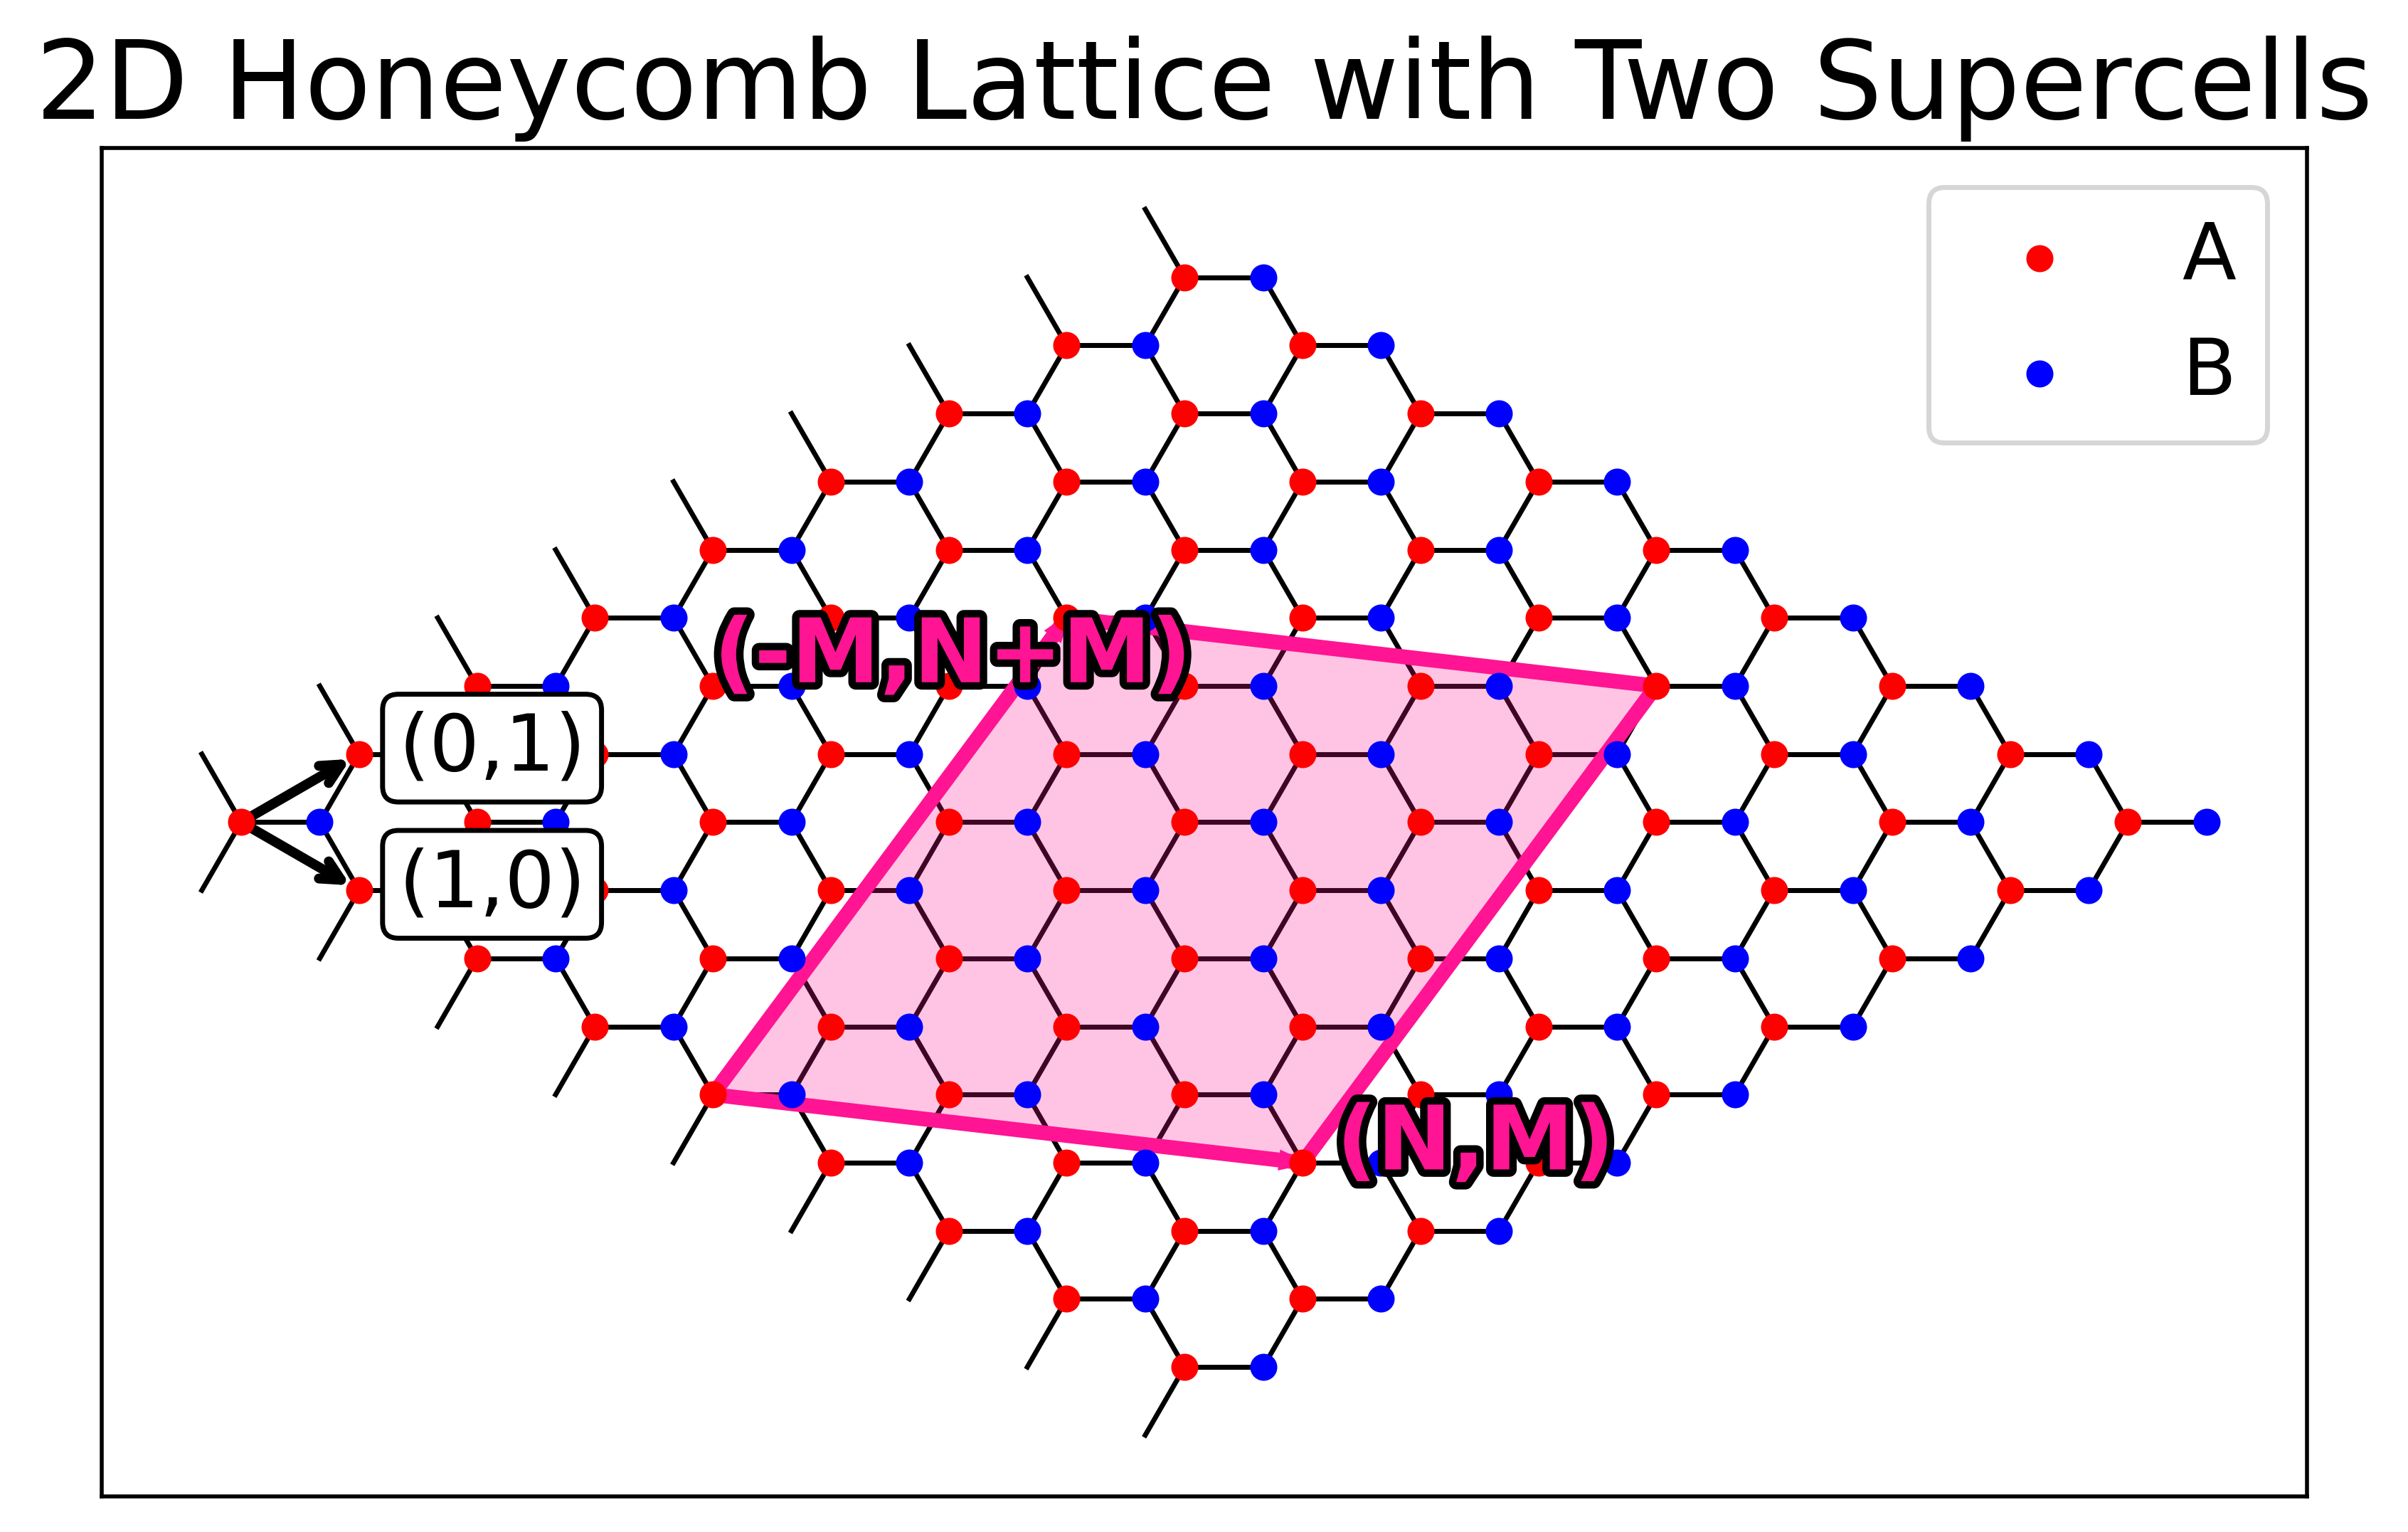

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def plot_double_supercell(N, M, n1=4, n2=4):
    # Define primitive lattice vectors for the honeycomb structure
    a1 = np.array([1.5, -np.sqrt(3)/2])
    a2 = np.array([1.5, np.sqrt(3)/2])
    delta = np.array([1.0, 0.0])  # Shift for B sublattice

    # Generate all lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sublattice sites
    ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=20, label='A', zorder=6)
    ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=20, label='B', zorder=6)

    # Draw nearest neighbor bonds for A sublattice
    neighbor_vectors = np.array([
        [1.0, 0.0],
        [-0.5, np.sqrt(3)/2],
        [-0.5, -np.sqrt(3)/2]
    ])
    for r in A:
        for v in neighbor_vectors:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the third A site from the left on the row closest to y=0
    tol = 0.1
    mask = np.abs(A[:, 1]) < tol
    A_xsorted = A[mask][np.argsort(A[mask][:, 0])]
    if len(A_xsorted) < 3:
        raise ValueError("Not enough A sites near the x-axis; try increasing n1/n2.")
    A_top = A_xsorted[2]  # 3rd from the left on y ≈ 0 row

    # Find all A sites with similar x, and y less than A_top (i.e., directly below A_top)
    x_tol = 0.2
    candidates = A[(np.abs(A[:, 0] - A_top[0]) < x_tol) & (A[:, 1] < A_top[1] - 1e-6)]
    # Sort these candidates by y ascending (from near to far downward)
    y_sorted = candidates[np.argsort(candidates[:, 1])]
    if len(y_sorted) < 2:
        raise ValueError("Not enough A sites below the reference; try increasing n1/n2.")
    A0 = y_sorted[0]  # Select the second one: two rows below A_top (supercell origin)

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    corners_red = np.array([
        A0,
        A0 + L1_red,
        A0 + L1_red + L2_red,
        A0 + L2_red,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='deeppink', alpha=0.25, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, zorder=3)
    ax.arrow(A0[0], A0[1], L1_red[0], L1_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)
    ax.arrow(A0[0], A0[1], L2_red[0], L2_red[1], width=0.04, head_width=0.18, length_includes_head=True, color='deeppink', zorder=4)

    # Green supercell: (M, N), (-N, M+N)
    L1_green = M * a1 + N * a2
    L2_green = -N * a1 + (M + N) * a2
    corners_green = np.array([
        A0,
        A0 + L1_green,
        A0 + L1_green + L2_green,
        A0 + L2_green,
        A0
    ])
    #ax.fill(corners_green[:, 0], corners_green[:, 1], color='lightgreen', alpha=0.18, zorder=2)
    #ax.plot(corners_green[:, 0], corners_green[:, 1], color='lightgreen', lw=3, zorder=3)
    #ax.arrow(A0[0], A0[1], L1_green[0], L1_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)
    #ax.arrow(A0[0], A0[1], L2_green[0], L2_green[1], width=0.04, head_width=0.18, length_includes_head=True, color='lightgreen', zorder=4)

    # Function to draw colored labels with black outline and farther from supercell edge
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(
            *xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
            path_effects=[withStroke(linewidth=3, foreground='black')],zorder=200
        )

    # Place labels well away from the vectors (increase the distance factor)
    offset_red1 = 1.2  # > 1.1
    offset_red2 = 0.9
    offset_green1 = 1.2
    offset_green2 = 1.15

    label_with_outline(A0 + offset_red1*L1_red + np.array([0.7, 0.4]), '(N,M)', 'deeppink', 18)
    label_with_outline(A0 + offset_red2*L2_red + np.array([-1.0, 0.1]), '(-M,N+M)', 'deeppink', 18)
    #label_with_outline(A0 + offset_green1*L1_green + np.array([0.7, 0.4]), '(M,N)', 'lightgreen', 18)
    #label_with_outline(A0 + offset_green2*L2_green + np.array([-1.0, 0.1]), '(-N,M+N)', 'lightgreen', 18)

    # Draw (1,0) and (0,1) from leftmost B site for reference
    idx_leftmost = np.argmin(B[:, 0])
    Bref = A[idx_leftmost]
    Bref1 = Bref + a1
    Bref2 = Bref + a2
    ax.annotate('', xy=Bref1, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.annotate('', xy=Bref2, xytext=Bref, arrowprops=dict(arrowstyle='->', color='k', lw=2))
    ax.text(*(Bref1 + np.array([0.5, -0.2])), '(1,0)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.text(*(Bref2 + np.array([0.5, -0.2])), '(0,1)', fontsize=16, color='k',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=1.0), zorder=100)

    ax.set_aspect('equal')
    ax.set_title('2D Honeycomb Lattice with Two Supercells', fontsize=22)
    ax.legend(loc='upper right', fontsize=16)
    plt.show()

# Example usage
plot_double_supercell(N=3, M=2)

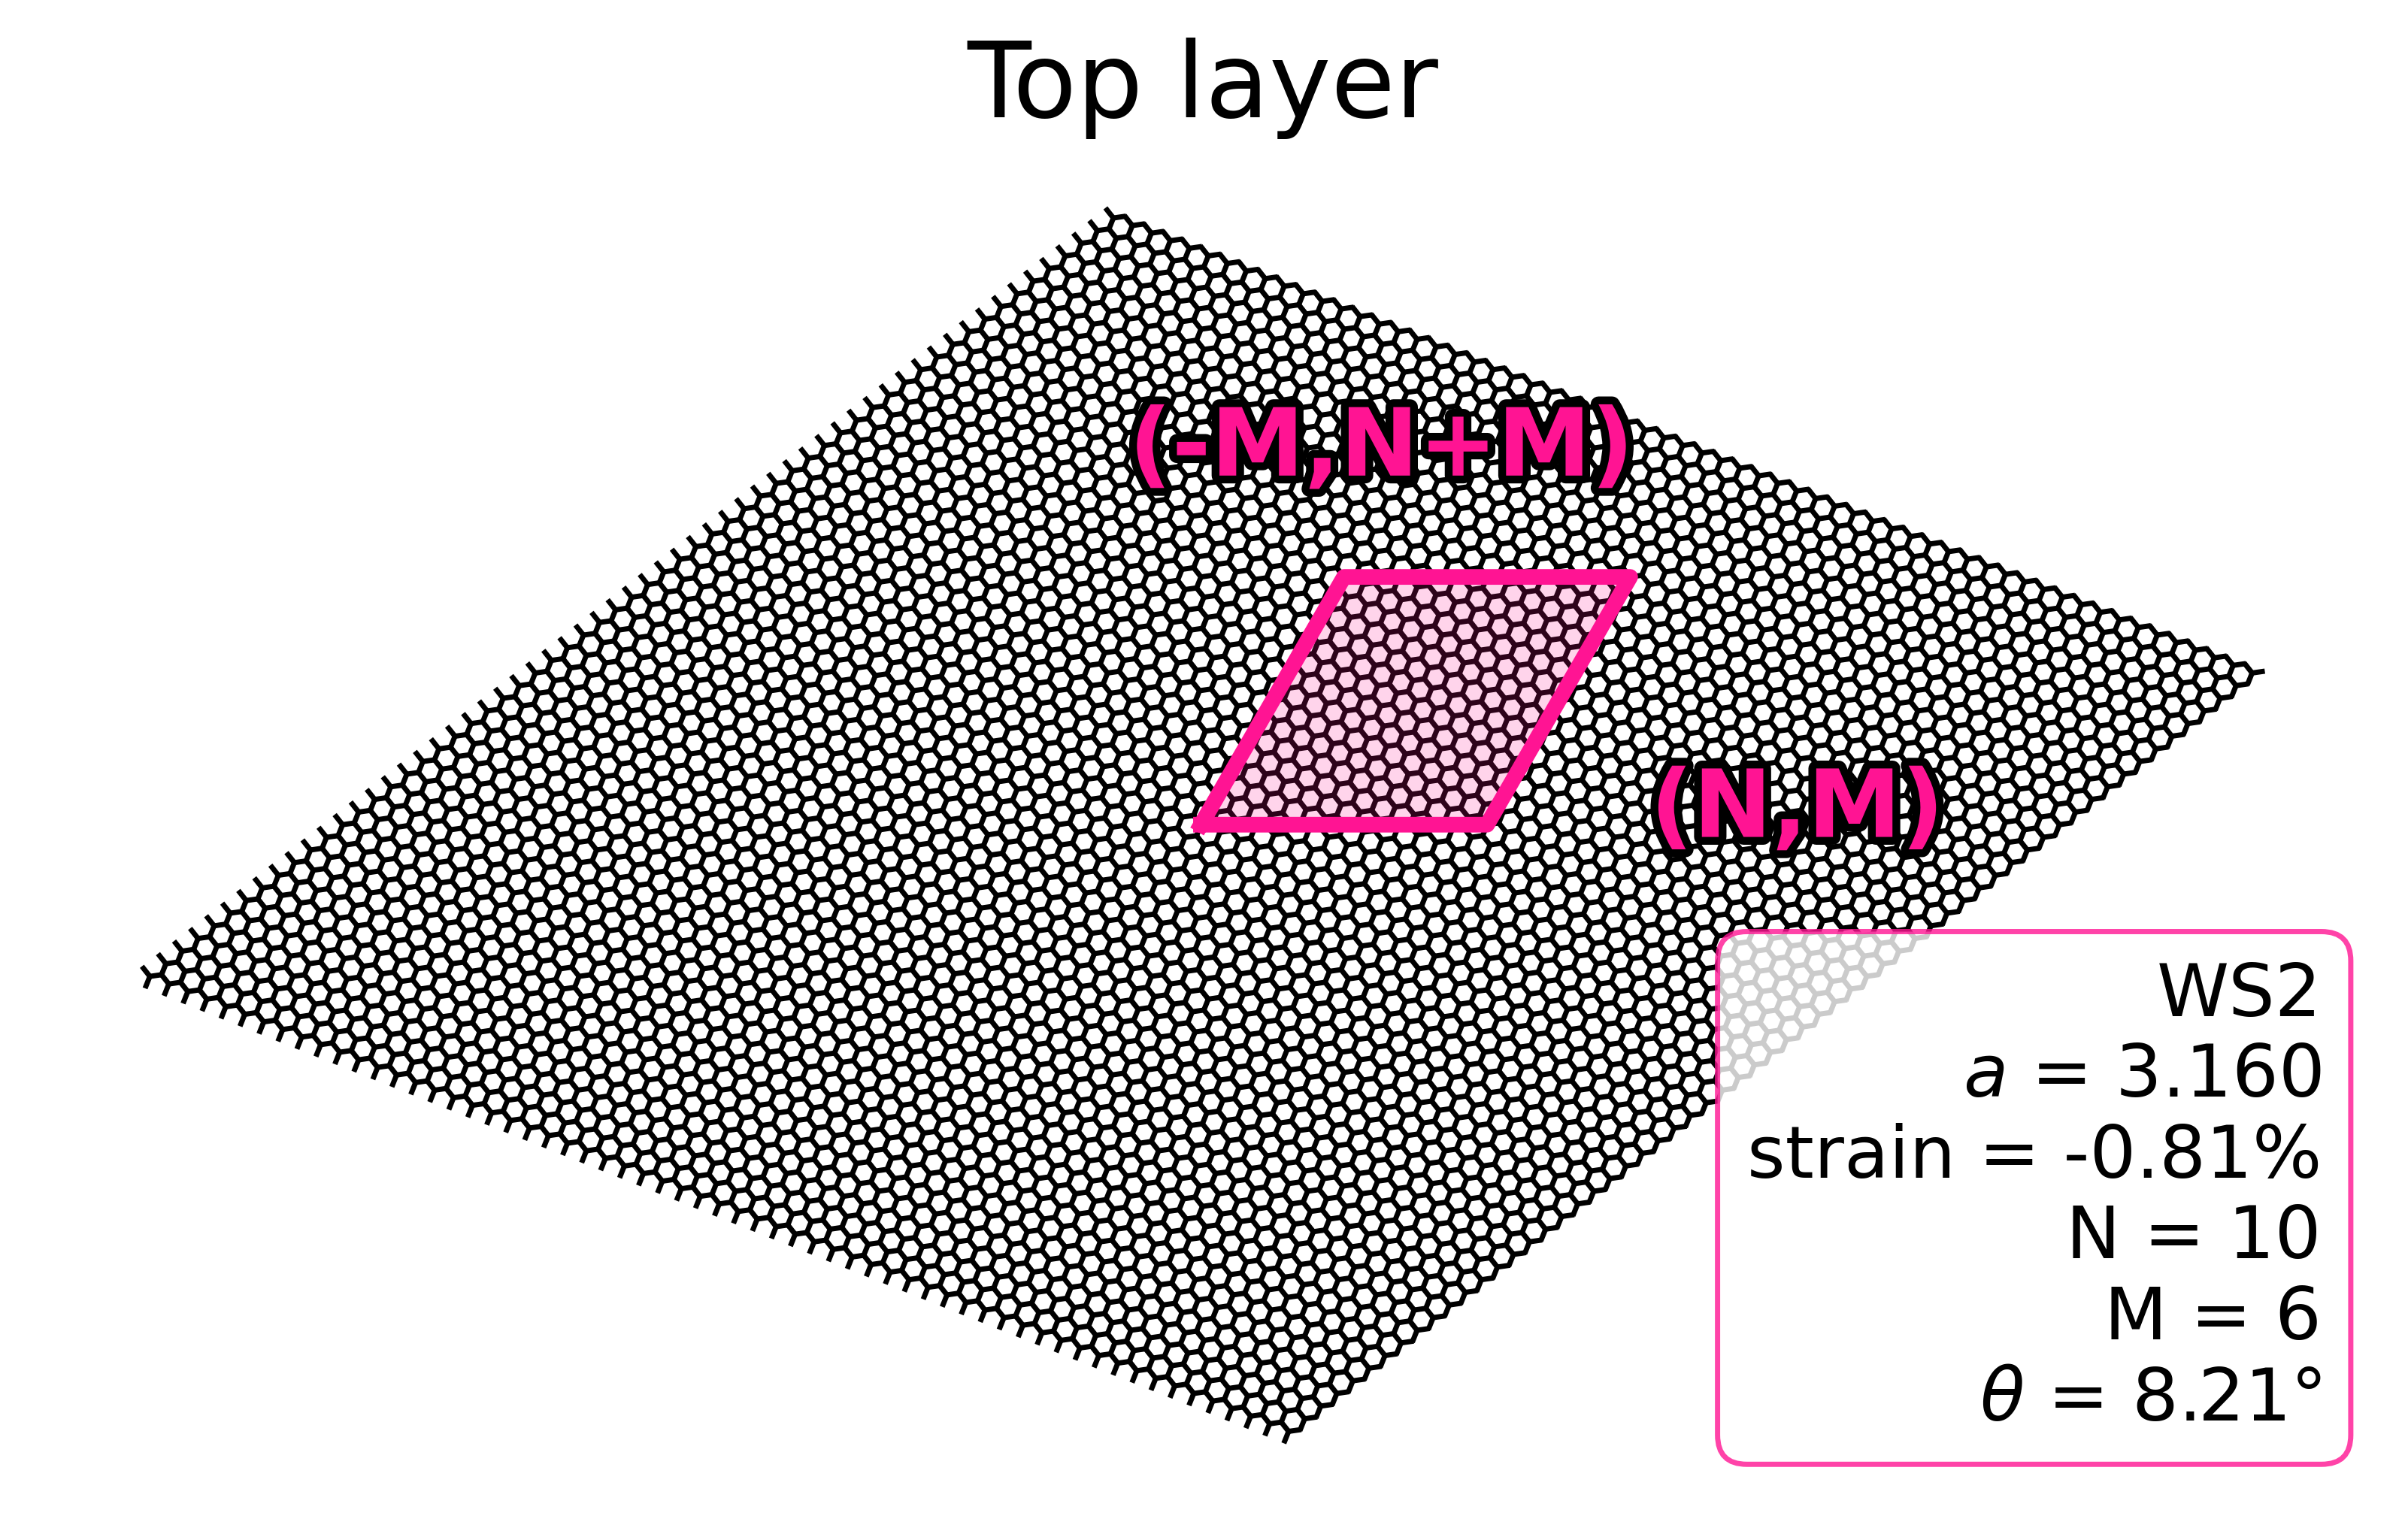

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def rotate_points(xy, theta_deg):
    """Rotate (N,2) array xy by theta_deg degrees about the origin."""
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return xy @ R.T

def plot_single_supercell_red(N, M, n1=30, n2=30, theta_deg=0, a=1.732, strain=0.0):
    """
    Plot a moiré supercell for a honeycomb lattice.
    Parameters:
        N, M:     Supercell parameters.
        n1, n2:   Number of unit cells shown in +/- directions.
        theta_deg:Rotation angle (degrees).
        a:        Lattice constant (default 1.732 ~ sqrt(3)).
        strain:   Relative strain to apply to a (e.g., 0.01 = +1%).
    """
    # === Apply strain to a ===
    a_strained = a * (1 + strain)
    # Primitive lattice vectors (length scales with strained a)
    a1 = a_strained * np.array([0.8660254, -0.5])   # [cos(-30°), sin(-30°)]
    a2 = a_strained * np.array([0.8660254,  0.5])   # [cos(30°),  sin(30°)]
    delta = np.array([a_strained/2, 0.0])           # B-sublattice offset

    # Generate lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    # === Rotate all sites and bonds by +theta_deg about the origin (counter-clockwise) ===
    A = rotate_points(A, +theta_deg)
    B = rotate_points(B, +theta_deg)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sites
    #ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=0.1, label='A', zorder=6)
    #ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=0.1, label='B', zorder=6)

    # Draw bonds for A sublattice
    neighbor_vectors = a_strained * np.array([
        [0.5, 0.0],                                     # right
        [-0.25,  np.sqrt(3)/4],                         # upper left
        [-0.25, -np.sqrt(3)/4]                          # lower left
    ])
    neighbor_vectors_rot = rotate_points(neighbor_vectors, +theta_deg)
    for r in A:
        for v in neighbor_vectors_rot:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the A site closest to the center (0,0) as the supercell origin
    A0 = A[np.argmin(np.linalg.norm(A, axis=1))]

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    # Rotate lattice vectors too!
    L1_red_rot = rotate_points(L1_red[None, :], +theta_deg)[0]
    L2_red_rot = rotate_points(L2_red[None, :], +theta_deg)[0]
    corners_red = np.array([
        A0,
        A0 + L1_red_rot,
        A0 + L1_red_rot + L2_red_rot,
        A0 + L2_red_rot,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='deeppink', alpha=0.18, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='deeppink', lw=3, zorder=3)
    #ax.arrow(A0[0], A0[1], L1_red_rot[0], L1_red_rot[1], width=0.04, head_width=0.18,
    #         length_includes_head=True, color='deeppink', zorder=4)
    #ax.arrow(A0[0], A0[1], L2_red_rot[0], L2_red_rot[1], width=0.04, head_width=0.18,
    #         length_includes_head=True, color='deeppink', zorder=4)

    # Label supercell vectors, farther from lines
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(*xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
                path_effects=[withStroke(linewidth=3, foreground='black')], zorder=200)

    offset_red1 = 2
    offset_red2 = 1.5
    label_with_outline(A0 + offset_red1*L1_red_rot + np.array([0.7, 0.4]), '(N,M)', 'deeppink', 18)
    label_with_outline(A0 + offset_red2*L2_red_rot + np.array([-1.0, 0.1]), '(-M,N+M)', 'deeppink', 18)

    ax.set_aspect('equal')
    ax.set_axis_off() 

    # Add a small info box (legend-style) for parameters
    info_text = f"WS2\n$a$ = {a:.3f}\nstrain = {strain:.2f}%\nN = {N}\nM = {M}\n$\\theta$ = {theta_deg:.2f}°"
    ax.text(
        0.98, 0.4, info_text,
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=14, color='k',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='deeppink')
    )

    ax.set_title('Top layer', fontsize=20)
    #ax.legend(loc='upper right', fontsize=14)
    plt.show()

# Example usage:
# a = 3.16  # for MoS2, for example
# strain = 0.01  # +1% strain
plot_single_supercell_red(N=10, M=6, theta_deg=16.43/2, a=3.16, strain=-0.8107945)

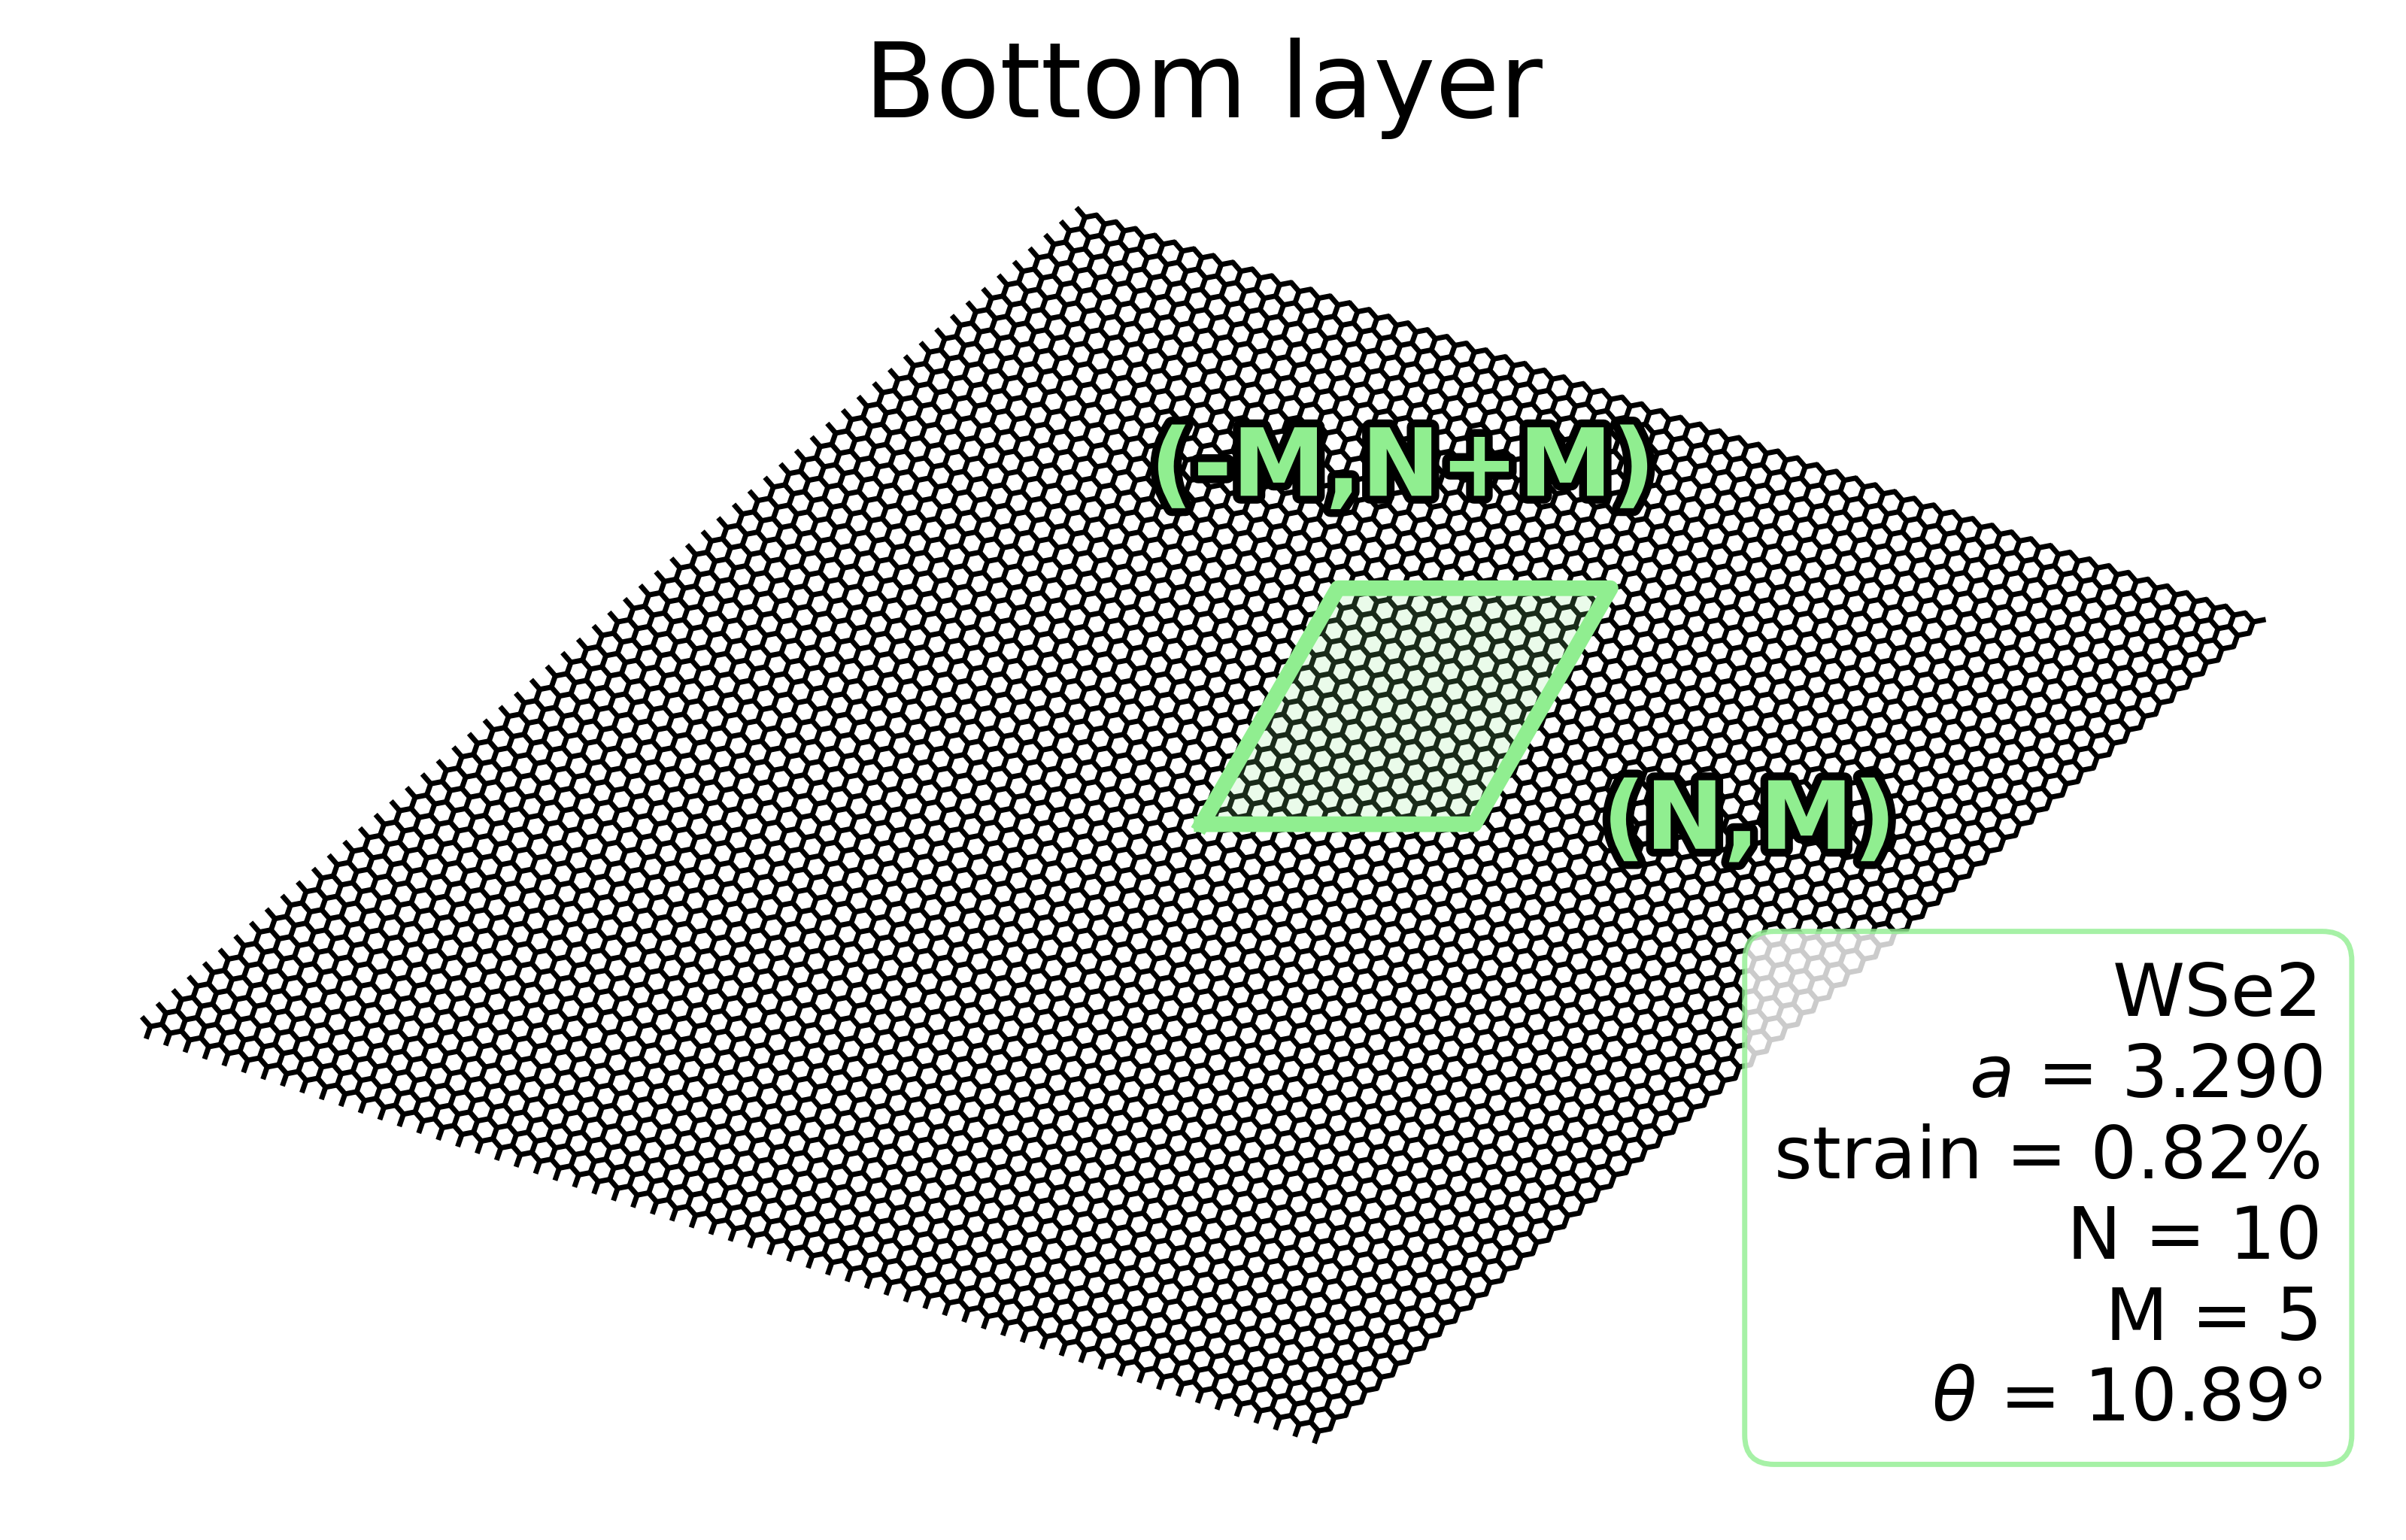

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def rotate_points(xy, theta_deg):
    """Rotate (N,2) array xy by theta_deg degrees about the origin."""
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return xy @ R.T

def plot_single_supercell_red(N, M, n1=30, n2=30, theta_deg=0, a=1.732, strain=0.0):
    """
    Plot a moiré supercell for a honeycomb lattice.
    Parameters:
        N, M:     Supercell parameters.
        n1, n2:   Number of unit cells shown in +/- directions.
        theta_deg:Rotation angle (degrees).
        a:        Lattice constant (default 1.732 ~ sqrt(3)).
        strain:   Relative strain to apply to a (e.g., 0.01 = +1%).
    """
    # === Apply strain to a ===
    a_strained = a * (1 + strain)
    # Primitive lattice vectors (length scales with strained a)
    a1 = a_strained * np.array([0.8660254, -0.5])   # [cos(-30°), sin(-30°)]
    a2 = a_strained * np.array([0.8660254,  0.5])   # [cos(30°),  sin(30°)]
    delta = np.array([a_strained/2, 0.0])           # B-sublattice offset

    # Generate lattice sites for both sublattices
    A_sites, B_sites = [], []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
            B_sites.append(r + delta)
    A = np.array(A_sites)
    B = np.array(B_sites)

    # === Rotate all sites and bonds by +theta_deg about the origin (counter-clockwise) ===
    A = rotate_points(A, +theta_deg)
    B = rotate_points(B, +theta_deg)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot A and B sites
    #ax.scatter(A[:, 0], A[:, 1], c='red', marker='o', s=0.1, label='A', zorder=6)
    #ax.scatter(B[:, 0], B[:, 1], c='blue', marker='o', s=0.1, label='B', zorder=6)

    # Draw bonds for A sublattice
    neighbor_vectors = a_strained * np.array([
        [0.5, 0.0],                                     # right
        [-0.25,  np.sqrt(3)/4],                         # upper left
        [-0.25, -np.sqrt(3)/4]                          # lower left
    ])
    neighbor_vectors_rot = rotate_points(neighbor_vectors, +theta_deg)
    for r in A:
        for v in neighbor_vectors_rot:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=1, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([])

    # Find the A site closest to the center (0,0) as the supercell origin
    A0 = A[np.argmin(np.linalg.norm(A, axis=1))]

    # Red supercell: (N, M), (-M, N+M)
    L1_red = N * a1 + M * a2
    L2_red = -M * a1 + (N + M) * a2
    # Rotate lattice vectors too!
    L1_red_rot = rotate_points(L1_red[None, :], +theta_deg)[0]
    L2_red_rot = rotate_points(L2_red[None, :], +theta_deg)[0]
    corners_red = np.array([
        A0,
        A0 + L1_red_rot,
        A0 + L1_red_rot + L2_red_rot,
        A0 + L2_red_rot,
        A0
    ])
    ax.fill(corners_red[:, 0], corners_red[:, 1], color='lightgreen', alpha=0.18, zorder=2)
    ax.plot(corners_red[:, 0], corners_red[:, 1], color='lightgreen', lw=3, zorder=3)
    #ax.arrow(A0[0], A0[1], L1_red_rot[0], L1_red_rot[1], width=0.04, head_width=0.18,
    #         length_includes_head=True, color='lightgreen', zorder=4)
    #ax.arrow(A0[0], A0[1], L2_red_rot[0], L2_red_rot[1], width=0.04, head_width=0.18,
    #         length_includes_head=True, color='lightgreen', zorder=4)

    # Label supercell vectors, farther from lines
    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(*xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
                path_effects=[withStroke(linewidth=3, foreground='black')], zorder=200)

    offset_red1 = 2
    offset_red2 = 1.5
    label_with_outline(A0 + offset_red1*L1_red_rot + np.array([0.7, 0.4]), '(N,M)', 'lightgreen', 18)
    label_with_outline(A0 + offset_red2*L2_red_rot + np.array([-1.0, 0.1]), '(-M,N+M)', 'lightgreen', 18)

    ax.set_aspect('equal')
    ax.set_axis_off() 

    # Add a small info box (legend-style) for parameters
    info_text = f"WSe2\n$a$ = {a:.3f}\nstrain = {strain:.2f}%\nN = {N}\nM = {M}\n$\\theta$ = {theta_deg:.2f}°"
    ax.text(
        0.98, 0.4, info_text,
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=14, color='k',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='lightgreen')
    )

    ax.set_title('Bottom layer', fontsize=20)
    #ax.legend(loc='upper right', fontsize=14)
    plt.show()

# Example usage:
# a = 3.16  # for MoS2, for example
# strain = 0.01  # +1% strain
plot_single_supercell_red(N=10, M=5, theta_deg=21.79/2, a=3.29, strain=0.8241589)

In [61]:
import numpy as np

def moire_theta(N, M):
    numerator = N**2 + 4*N*M + M**2
    denominator = 2 * (N**2 + N*M + M**2)
    cos_theta = numerator / denominator
    # Clip for safety against numerical error
    cos_theta = np.clip(cos_theta, -1.0, 1.0)
    theta_deg = np.degrees(np.arccos(cos_theta))
    return theta_deg

# Example usage
N, M = 10, 5
print(moire_theta(N, M))

21.78678929826181


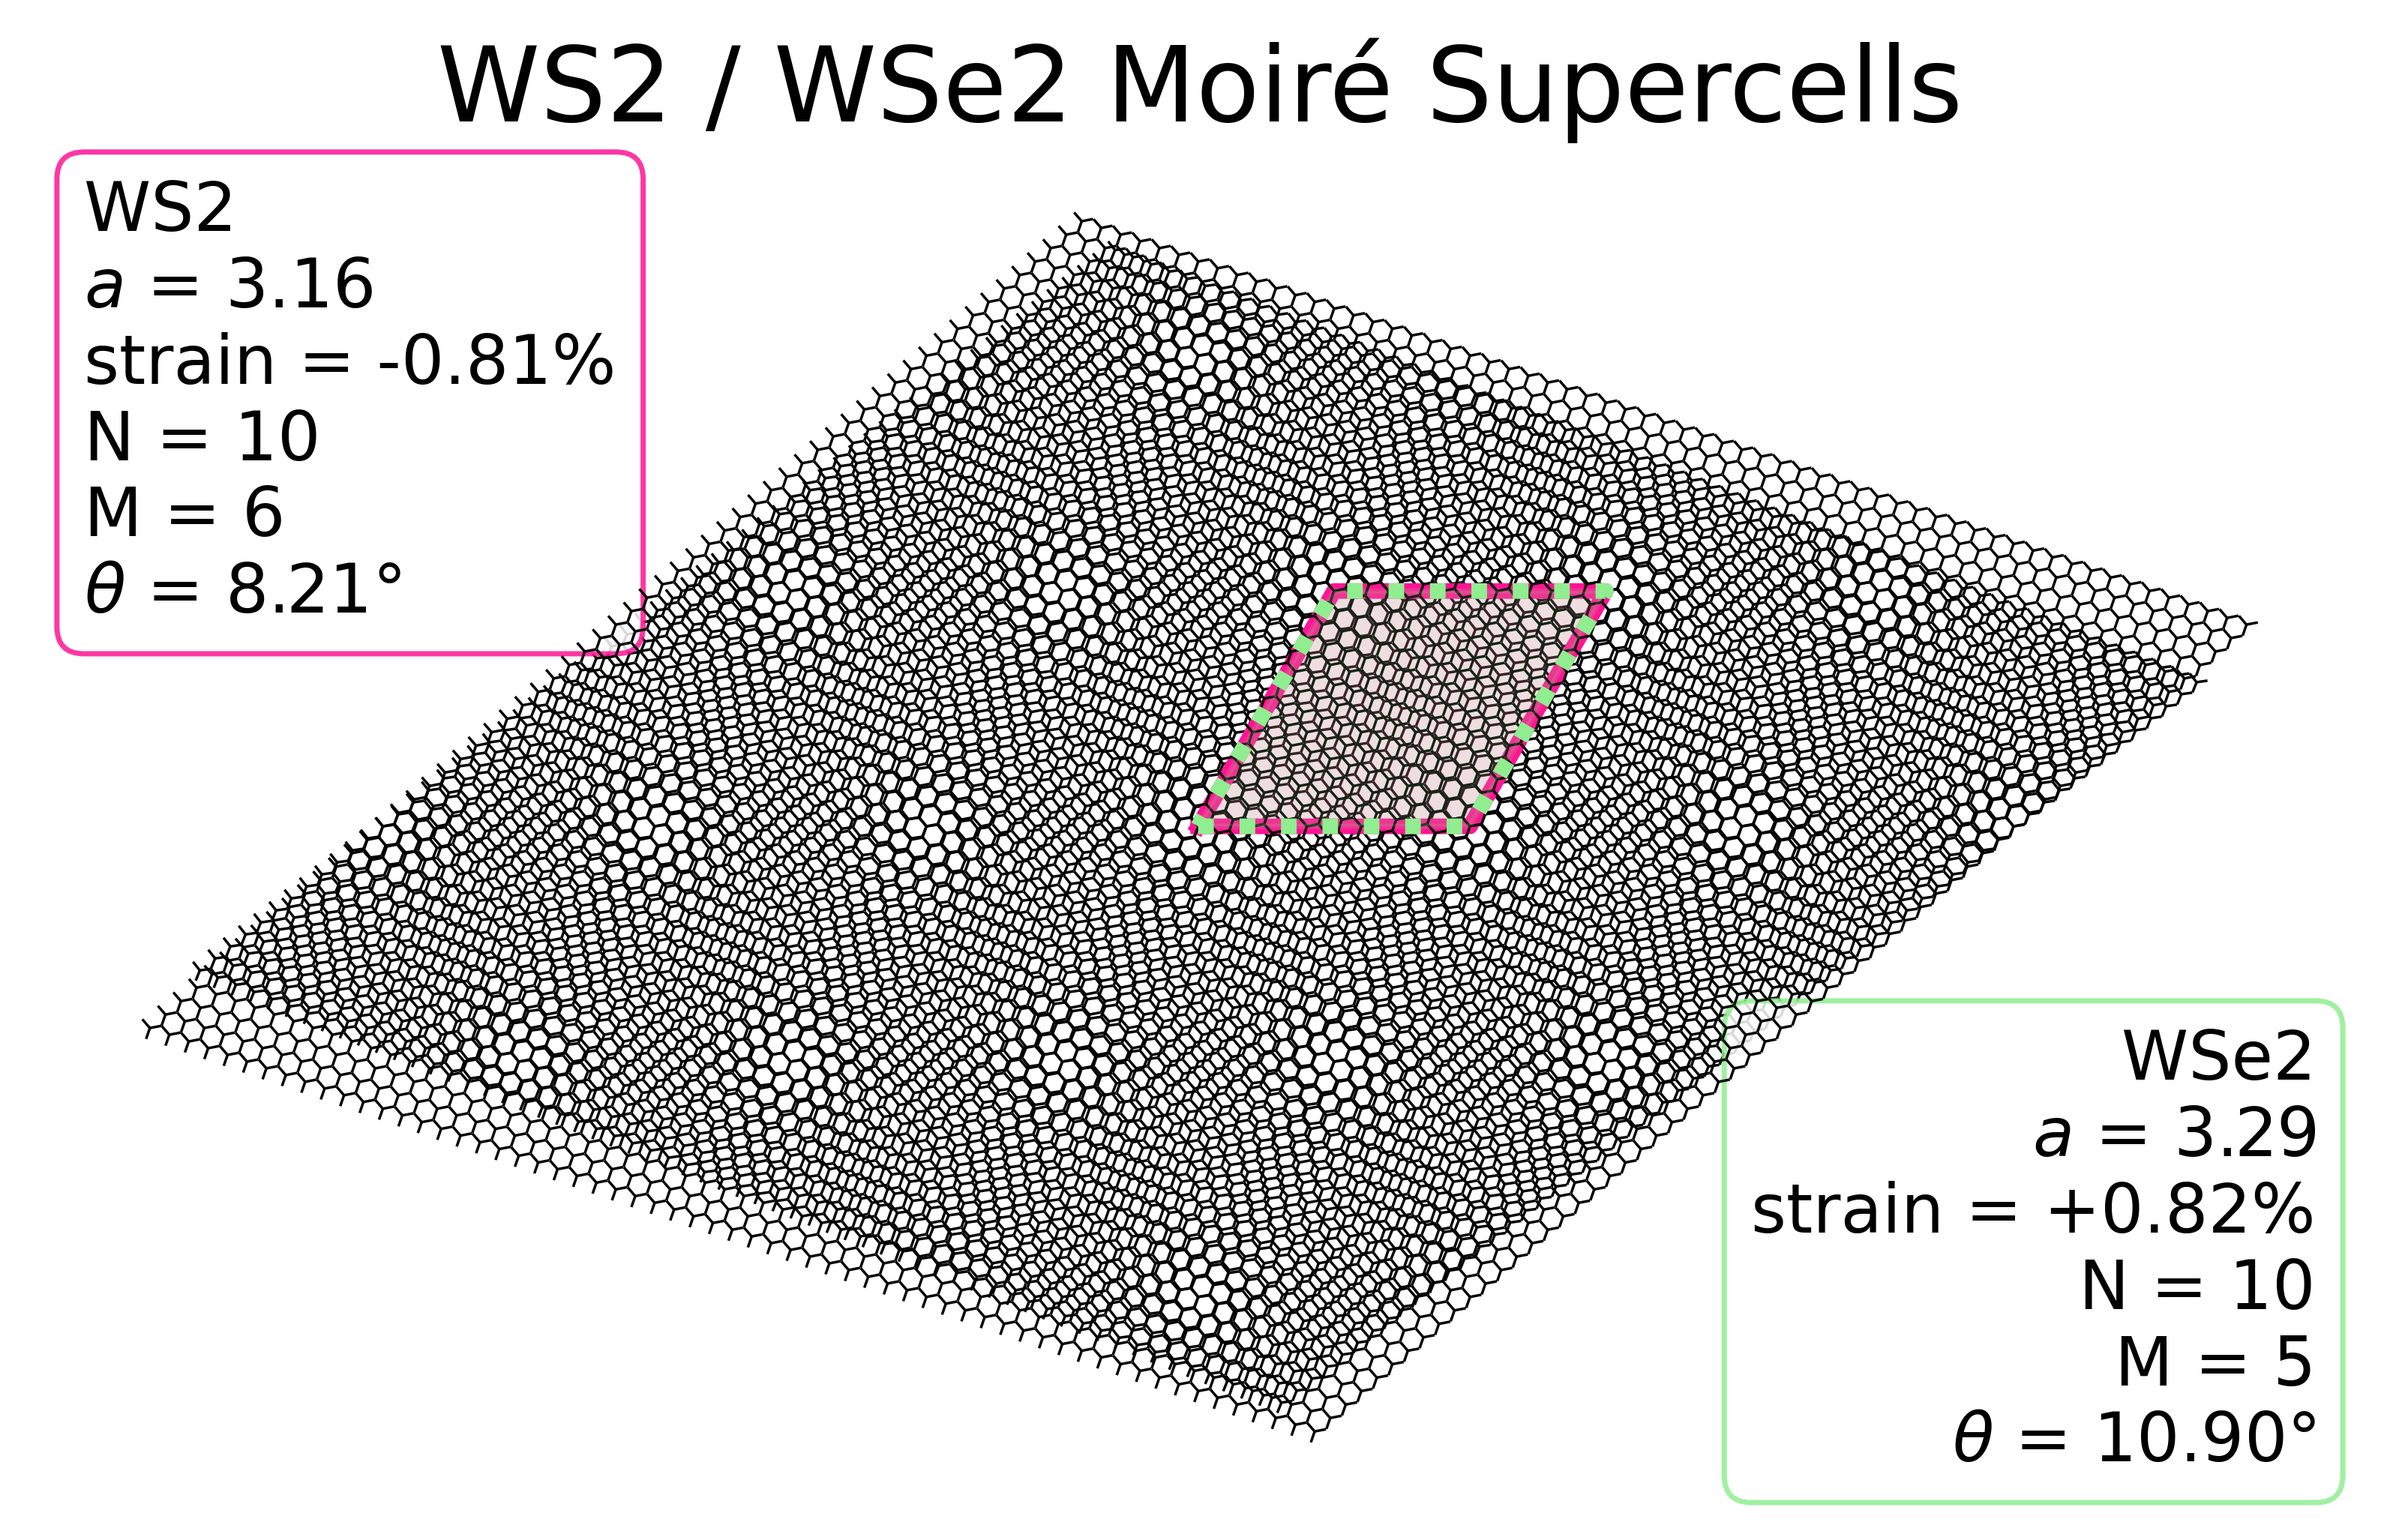

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke

def rotate_points(xy, theta_deg):
    """Rotate (N,2) array xy by theta_deg degrees about the origin."""
    theta = np.deg2rad(theta_deg)
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    return xy @ R.T

def plot_single_supercell(ax, N, M, n1, n2, theta_deg, a, strain, 
                         color='deeppink', box_text='', zorder=1, linestyle='-',
                         legend_pos='custom'):
    # === Apply strain to a ===
    a_strained = a * (1 + strain)
    # Primitive lattice vectors
    a1 = a_strained * np.array([0.8660254, -0.5])
    a2 = a_strained * np.array([0.8660254,  0.5])
    delta = np.array([a_strained/2, 0.0])

    # Generate lattice sites for both sublattices
    A_sites = []
    for i in range(-n1, n1+1):
        for j in range(-n2, n2+1):
            r = i * a1 + j * a2
            A_sites.append(r)
    A = np.array(A_sites)
    A = rotate_points(A, +theta_deg)

    # Draw bonds for A sublattice
    neighbor_vectors = a_strained * np.array([
        [0.5, 0.0],
        [-0.25,  np.sqrt(3)/4],
        [-0.25, -np.sqrt(3)/4]
    ])
    neighbor_vectors_rot = rotate_points(neighbor_vectors, +theta_deg)
    for r in A:
        for v in neighbor_vectors_rot:
            ax.plot([r[0], r[0] + v[0]], [r[1], r[1] + v[1]], color='k', lw=0.5, zorder=zorder)

    # Find the A site closest to the center (0,0)
    A0 = A[np.argmin(np.linalg.norm(A, axis=1))]

    # Supercell: (N, M), (-M, N+M)
    L1 = N * a1 + M * a2
    L2 = -M * a1 + (N + M) * a2
    L1_rot = rotate_points(L1[None, :], +theta_deg)[0]
    L2_rot = rotate_points(L2[None, :], +theta_deg)[0]
    corners = np.array([
        A0,
        A0 + L1_rot,
        A0 + L1_rot + L2_rot,
        A0 + L2_rot,
        A0
    ])
    ax.fill(corners[:, 0], corners[:, 1], color=color, alpha=0.15, zorder=zorder+2)
    ax.plot(corners[:, 0], corners[:, 1], color=color, lw=3, zorder=zorder+3, linestyle=linestyle)
    #ax.arrow(A0[0], A0[1], L1_rot[0], L1_rot[1], width=0.04, head_width=0.18,
    #         length_includes_head=True, color=color, zorder=zorder+4)
    #ax.arrow(A0[0], A0[1], L2_rot[0], L2_rot[1], width=0.04, head_width=0.18,
    #         length_includes_head=True, color=color, zorder=zorder+4)

    def label_with_outline(xy, label, color, fontsize=18):
        ax.text(*xy, label, fontsize=fontsize, color=color, weight='bold', ha='center', va='center',
                path_effects=[withStroke(linewidth=3, foreground='black')], zorder=200)

    offset1 = 2
    offset2 = 1.5
    #label_with_outline(A0 + offset1*L1_rot + np.array([0.7, 0.4]), '(N,M)', color, 16)
    #label_with_outline(A0 + offset2*L2_rot + np.array([-1.0, 0.1]), '(-M,N+M)', color, 16)

    # Info box at specified legend_pos
    if legend_pos == 'lefttop':
        x, y = 0.02, 0.98
        ha, va = 'left', 'top'
    elif legend_pos == 'leftbottom':
        x, y = 0.02, 0.02
        ha, va = 'left', 'bottom'
    elif legend_pos == 'righttop':
        x, y = 0.98, 0.98
        ha, va = 'right', 'top'
    elif legend_pos == 'rightbottom':
        x, y = 0.98, 0.02
        ha, va = 'right', 'bottom'
    else:
        x, y = 0.98, 0.4-zorder*0.08
        ha, va = 'right', 'top'
    ax.text(
        x, y, box_text,
        transform=ax.transAxes,
        ha=ha, va=va,
        fontsize=13, color='k',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.85, edgecolor=color)
    )

# ----------- Main: plot two layers together -----------
fig, ax = plt.subplots(figsize=(8,8))

# Layer 1: info at left top
plot_single_supercell(
    ax, N=10, M=6, n1=30, n2=30, theta_deg=16.43/2, a=3.16, strain=-0.008107945, 
    color='deeppink',
    box_text="WS2\n$a$ = 3.16\nstrain = -0.81%\nN = 10\nM = 6\n$\\theta$ = 8.21°",
    zorder=1,
    legend_pos='lefttop'
)

# Layer 2: info at left bottom
plot_single_supercell(
    ax, N=10, M=5, n1=30, n2=30, theta_deg=21.7867/2, a=3.29, strain=0.008241589,
    color='lightgreen', linestyle='dotted',
    box_text="WSe2\n$a$ = 3.29\nstrain = +0.82%\nN = 10\nM = 5\n$\\theta$ = 10.90°",
    zorder=5,
    legend_pos='rightbottom'
)

ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('WS2 / WSe2 Moiré Supercells', fontsize=20)
plt.show()

## Hetero-moiré Supercell Example

| Layer      | N  | M  | Lattice Constant (Å) | Strain (%)   | Twisted Angle (deg) |
|------------|----|----|---------------------|--------------|-------------------|
| **Top (WS₂)**   | 10 | 6  | 3.16                | -0.81        | 8.21              |
| **Bottom (WSe₂)**| 10 | 5  | 3.29                | +0.82        | 10.90              |

- **Moiré rotation angle:** 2.68°
- **Total atoms:** 1113

# moire supercell lattice vector derivation


---

**Primitive lattice vectors of the honeycomb lattice:**

$$
\begin{align*}
\vec{b}_1 &= \left( \frac{\sqrt{3}}{2},\ -\frac{1}{2} \right) \\
\vec{b}_2 &= \left( \frac{\sqrt{3}}{2},\ \frac{1}{2} \right)
\end{align*}
$$

Here, $\vec{b}_1$ and $\vec{b}_2$ are the primitive lattice vectors in Cartesian coordinates, describing the repeating structure of the 2D honeycomb lattice.

---

**Lattice matrix constructed from the primitive vectors:**

$$
\begin{align*}
B &= 
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
$$

Matrix $B$ uses $\vec{b}_1$ and $\vec{b}_2$ as its columns. This matrix is useful for transforming between lattice and Cartesian coordinates.

---

**General formula for the inverse of a $2\times2$ matrix:**

$$
\begin{align*}
B^{-1} = \frac{1}{\det(B)}
\begin{pmatrix}
b_{22} & -b_{12} \\
-b_{21} & b_{11}
\end{pmatrix}
\end{align*}
$$

$B^{-1}$ is the inverse of matrix $B$, written in terms of the matrix elements $b_{ij}$. This formula applies to any $2\times2$ matrix.

---

**Explicit calculation of $B^{-1}$ for the honeycomb lattice:**

$$
B^{-1} = \frac{2}{\sqrt{3}}
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{1}{2} & \frac{\sqrt{3}}{2}
\end{pmatrix}
= \begin{pmatrix}
\frac{1}{\sqrt{3}} & -1 \\
\frac{1}{\sqrt{3}} & 1
\end{pmatrix}
$$

By substituting the specific entries of $B$ and its determinant, we get this explicit inverse for the honeycomb lattice.

---

**Definition of the Gram matrix (metric tensor):**

$$
\begin{align*}
G &= B^{T} B = 
\begin{pmatrix}
\frac{\sqrt{3}}{2} & -\frac{1}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix} =
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1
\end{pmatrix}
$$

The Gram matrix $G$ encodes the inner products of the lattice vectors, capturing geometric properties such as lengths and angles in the lattice.

---

**Supercell basis vector 1:**

$$
\begin{align*}
\vec{b}_1' = (N, M)
\end{align*}
$$

Here, $\vec{b}_1'$ defines the first supercell lattice vector as an integer linear combination of the original basis vectors.

---

**Supercell basis vector 2 via $60^\circ$ rotation:**

$$
\begin{align*}
\vec{b}_2' = R_\mathrm{basis}(60^\circ)\ \vec{b}_1'
\end{align*}
$$

The second supercell vector $\vec{b}_2'$ is obtained by rotating $\vec{b}_1'$ by $60^\circ$ in the basis coordinate system.

---

**$60^\circ$ rotation matrix in Cartesian coordinates:**

$$
\begin{align*}
R_\mathrm{cart}(60^\circ) = 
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
$$

This matrix rotates a vector by $60^\circ$ counterclockwise in Cartesian space.

---

**$60^\circ$ rotation matrix in lattice basis:**

$$
\begin{align*}
R_\mathrm{basis} = B^{-1} R_\mathrm{cart} B
\end{align*}
$$

To rotate in lattice coordinates, sandwich the Cartesian rotation matrix between $B^{-1}$ and $B$.

---

**Explicit calculation of $R_\mathrm{basis}$:**

$$
\begin{align*}
R_\mathrm{basis} &=
\begin{pmatrix} 
\frac{1}{\sqrt{3}} & -1 \\ 
\frac{1}{\sqrt{3}} & 1 
\end{pmatrix}
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
\\[1em]
&=
\begin{pmatrix}
\frac{1}{\sqrt{3}} & -1 \\
\frac{1}{\sqrt{3}} & 1
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & 0 \\
\frac{1}{2} & 1
\end{pmatrix} =
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

Step-by-step calculation of the rotation matrix in the lattice basis, starting from its definition in terms of $B$, $B^{-1}$, and $R_\mathrm{cart}(60^\circ)$.

---

**Final $60^\circ$ rotation matrix in basis coordinates:**

$$
\begin{align*}
R_\mathrm{basis} = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

The final form of the rotation matrix in the lattice basis.

---

**Formula for the second supercell basis vector after rotation:**

$$
\begin{align*}
\Rightarrow\ 
\vec{b}_2' = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
N \\
M
\end{pmatrix}
=
\begin{pmatrix}
-M \\
N + M
\end{pmatrix}
\end{align*}
$$

Applying the rotation to $\vec{b}_1'$ gives the explicit expression for the second supercell basis vector, $\vec{b}_2'$.

---

**Supercell basis vector 1:**

$$
\begin{align*}
\vec{b}_1' = (N, M)
\end{align*}
$$

Here, $\vec{b}_1'$ defines the first supercell lattice vector as an integer linear combination of the original basis vectors.

---

**Supercell basis vector 2 via $60^\circ$ rotation:**

$$
\begin{align*}
\vec{b}_2' = R_\mathrm{basis}(60^\circ)\ \vec{b}_1'
\end{align*}
$$

The second supercell vector $\vec{b}_2'$ is obtained by rotating $\vec{b}_1'$ by $60^\circ$ in the basis coordinate system.

---

**$60^\circ$ rotation matrix in Cartesian coordinates:**

$$
\begin{align*}
R_\mathrm{cart}(60^\circ) = 
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\end{align*}
$$

This matrix rotates a vector by $60^\circ$ counterclockwise in Cartesian space.

---

**$60^\circ$ rotation matrix in lattice basis:**

$$
\begin{align*}
R_\mathrm{basis} = B^{-1} R_\mathrm{cart} B
\end{align*}
$$

To rotate in lattice coordinates, sandwich the Cartesian rotation matrix between $B^{-1}$ and $B$.

---

**Explicit calculation of $R_\mathrm{basis}$:**

$$
\begin{align*}
R_\mathrm{basis} &=
\begin{pmatrix} 
\frac{1}{\sqrt{3}} & -1 \\ 
\frac{1}{\sqrt{3}} & 1 
\end{pmatrix}
\begin{pmatrix}
\frac{1}{2} & -\frac{\sqrt{3}}{2} \\
\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & \frac{\sqrt{3}}{2} \\
-\frac{1}{2} & \frac{1}{2}
\end{pmatrix}
\\[1em]
&=
\begin{pmatrix}
\frac{1}{\sqrt{3}} & -1 \\
\frac{1}{\sqrt{3}} & 1
\end{pmatrix}
\begin{pmatrix}
\frac{\sqrt{3}}{2} & 0 \\
\frac{1}{2} & 1
\end{pmatrix} =
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

Step-by-step calculation of the rotation matrix in the lattice basis, starting from its definition in terms of $B$, $B^{-1}$, and $R_\mathrm{cart}(60^\circ)$.

---

**Final $60^\circ$ rotation matrix in basis coordinates:**

$$
\begin{align*}
R_\mathrm{basis} = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\end{align*}
$$

The final form of the rotation matrix in the lattice basis.

---

**Formula for the second supercell basis vector after rotation:**

$$
\begin{align*}
\Rightarrow\ 
\vec{b}_2' = 
\begin{pmatrix}
0 & -1 \\
1 & 1
\end{pmatrix}
\begin{pmatrix}
N \\
M
\end{pmatrix}
=
\begin{pmatrix}
-M \\
N + M
\end{pmatrix}
\end{align*}
$$

Applying the rotation to $\vec{b}_1'$ gives the explicit expression for the second supercell basis vector, $\vec{b}_2'$.

---

# moire supercell twist angle derivation (heterobilayer)

**For heterobilayer, $\theta$ is determined by the angle between $(N_t, M_t)$ and $(M_b, N_b)$:**

$$
\vec{u_t} = 
\begin{pmatrix}
N_t \\
M_t
\end{pmatrix}
,\quad
\vec{u_b} = 
\begin{pmatrix}
N_b \\
M_b
\end{pmatrix}
$$

---

**The cosine of the angle between $\vec{u}$ and $\vec{v}$:**

$$
\cos\theta = \frac{\vec{u_t} \cdot \vec{u_b}}{|\vec{u_t}||\vec{u_b}|}
$$

This is the standard definition of the angle between two vectors.

---

**Generalized inner product using the lattice Gram matrix:**

$$
\vec{u_t} \cdot \vec{u_b} = \vec{u_t}^{\,T} G \vec{u_b} =
\begin{pmatrix} N_t & M_t \end{pmatrix}
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1
\end{pmatrix}
\begin{pmatrix} N_b \\ M_b \end{pmatrix}
$$

$$
=
\begin{pmatrix} N_t & M_t \end{pmatrix}
\begin{pmatrix}
N_b + \frac{1}{2}M_b \\
\frac{1}{2}N_b+ M_b
\end{pmatrix}
$$

$$
= N_tN_b + \frac{1}{2}N_tM_b + \frac{1}{2}N_bM_t + M_tM_b
$$

The Gram matrix $G$ encodes the geometric information of the lattice. (This term is needed for non-orthogonal basis)

---

**The squared norm of either vector:**

$$
|\vec{u_t}|^2 = \vec{u_t} \cdot \vec{u_t} = \vec{u_t}^{\,T} G \vec{u_t}
= (N_t, M_t)
\begin{pmatrix}
1 & \frac{1}{2} \\
\frac{1}{2} & 1
\end{pmatrix}
\begin{pmatrix}
N_t \\ M_t
\end{pmatrix}
$$

$$
= (N_t, M_t)
\begin{pmatrix}
N_t + \frac{1}{2}M_t \\
\frac{1}{2}N_t + M_t
\end{pmatrix}
= N_t^2 + N_tM_t + M_t^2
$$

---

**Final formula for the twist angle cosine:**

$$
\Rightarrow\ 
\cos\theta = \frac{N_tN_b + \frac{1}{2}N_tM_b + \frac{1}{2}N_bM_t + M_tM_b}{\sqrt{N_t^2 + N_tM_t + M_t^2}\sqrt{N_b^2 + N_bM_b + M_b^2}}
$$

This formula gives the cosine of the angle between the first supercell basis vectors $\vec{b}_1'$ of the top and bottom layers, which also corresponds to the twist angle of the homobilayer moiré superlattice.

# moire supercell lattice constant & number of atoms

$$
|\vec{u}|^2 = |\vec{v}|^2 = N^2 + NM + M^2
$$
After applying unit cell lattice constant scaling
$$
L_\mathrm{cell} = a_t \sqrt{N_t^2 + N_tM_t + M_t^2} = a_b \sqrt{N_b^2 + N_bM_b + M_b^2}
$$
The core of constructing a heterobilayer moiré supercell is to find pairs of supercell indices (N_t, M_t) and (N_b, M_b) that satisfy the equations above.

---

This supercell has $N^2 + NM + M^2$ unit cells for each layer.

Therefore, it has $3(N^2 + NM + M^2)$ atoms per layer.

The formula for calculating the total number of atoms is:
$$
N_{atoms} = 3(N_t^2 + N_tM_t + M_t^2) + 3(N_b^2 + N_bM_b + M_b^2).
$$